In [33]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import requests
import fiona
from fiona.crs import from_epsg
import numpy as np
import json
from pandas.io.json import json_normalize
import urllib.request, json 

from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon, shape
%matplotlib inline
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share" #window

In [2]:
#Get polygon of NYC
gdf = ox.gdf_from_place('New York City, NY, USA')

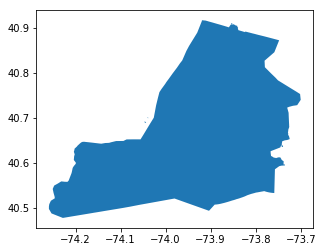

In [3]:
gdf.plot()

In [4]:
# define a bounding box in NYC
south, west, north, east = gdf.unary_union.buffer(0.1).bounds

In [5]:
print(south, west, north, east)

-74.35908999097687 40.37753432750217 -73.60019572851844 41.01617676767561


https://stackoverflow.com/questions/36516183/what-should-i-use-instead-of-urlopen-in-urllib3
https://stackoverflow.com/questions/12965203/how-to-get-json-from-webpage-into-python-script
https://stackoverflow.com/questions/7771011/parse-json-in-python
https://gis.stackexchange.com/questions/225586/reading-raw-data-into-geopandas
https://stackoverflow.com/questions/33559660/error-while-reading-json-file

In [9]:
url = "http://overpass-api.de/api/interpreter?data=[out:json];node[highway=traffic_signals](40.37753432750217,-74.35908999097687,41.01617676767561,-73.60019572851844);out%20meta;"
output = json.loads(requests.get(url).text)
list(output.keys())

['version', 'generator', 'osm3s', 'elements']

In [12]:
# converting json dataset from dictionary to dataframeprint(data.head())
df = json_normalize(output,'elements')
df.head()

,changeset,id,lat,lon,tags,timestamp,type,uid,user,version
0,60842978,42421728,40.798049,-73.960043,"{'crossing': 'traffic_signals', 'highway': 'tr...",2018-07-18T16:25:37Z,node,8500573,tabaya,5
1,47049187,42421731,40.798645,-73.961474,{'highway': 'traffic_signals'},2017-03-21T19:36:26Z,node,1597155,poornibadrinath,7
2,16529897,42421737,40.799237,-73.962876,{'highway': 'traffic_signals'},2013-06-12T21:03:39Z,node,1541236,AlexSof,8
3,16529671,42421741,40.800431,-73.965705,{'highway': 'traffic_signals'},2013-06-12T20:48:02Z,node,1541236,AlexSof,7
4,13681649,42421745,40.801401,-73.967994,{'highway': 'traffic_signals'},2012-10-30T02:20:04Z,node,716239,WestsideGuy,7


Turn df into geopandas dataframe


In [23]:
df['Coordinates'] = list(zip(df.lon, df.lat))
df.head()

,changeset,id,lat,lon,tags,timestamp,type,uid,user,version,Coordinates
0,60842978,42421728,40.798049,-73.960043,"{'crossing': 'traffic_signals', 'highway': 'tr...",2018-07-18T16:25:37Z,node,8500573,tabaya,5,"(-73.9600434, 40.7980486)"
1,47049187,42421731,40.798645,-73.961474,{'highway': 'traffic_signals'},2017-03-21T19:36:26Z,node,1597155,poornibadrinath,7,"(-73.9614743, 40.798645)"
2,16529897,42421737,40.799237,-73.962876,{'highway': 'traffic_signals'},2013-06-12T21:03:39Z,node,1541236,AlexSof,8,"(-73.962876, 40.7992369)"
3,16529671,42421741,40.800431,-73.965705,{'highway': 'traffic_signals'},2013-06-12T20:48:02Z,node,1541236,AlexSof,7,"(-73.9657046, 40.8004313)"
4,13681649,42421745,40.801401,-73.967994,{'highway': 'traffic_signals'},2012-10-30T02:20:04Z,node,716239,WestsideGuy,7,"(-73.9679942, 40.8014007)"


In [24]:
df['Coordinates'] = df['Coordinates'].apply(Point)


In [26]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

In [28]:
gdf.head()

,changeset,id,lat,lon,tags,timestamp,type,uid,user,version,Coordinates
0,60842978,42421728,40.798049,-73.960043,"{'crossing': 'traffic_signals', 'highway': 'tr...",2018-07-18T16:25:37Z,node,8500573,tabaya,5,POINT (-73.9600434 40.7980486)
1,47049187,42421731,40.798645,-73.961474,{'highway': 'traffic_signals'},2017-03-21T19:36:26Z,node,1597155,poornibadrinath,7,POINT (-73.96147430000001 40.798645)
2,16529897,42421737,40.799237,-73.962876,{'highway': 'traffic_signals'},2013-06-12T21:03:39Z,node,1541236,AlexSof,8,POINT (-73.96287599999999 40.7992369)
3,16529671,42421741,40.800431,-73.965705,{'highway': 'traffic_signals'},2013-06-12T20:48:02Z,node,1541236,AlexSof,7,POINT (-73.9657046 40.8004313)
4,13681649,42421745,40.801401,-73.967994,{'highway': 'traffic_signals'},2012-10-30T02:20:04Z,node,716239,WestsideGuy,7,POINT (-73.96799420000001 40.8014007)


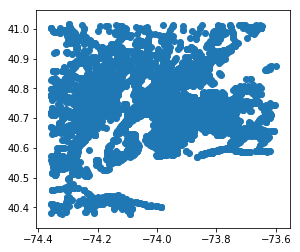

In [30]:
gdf.plot()

In [31]:
gdf.crs

In [34]:
gdf.crs = from_epsg(4326)


In [35]:
cd

C:\Users\szej01
